In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing['price'] = housing['price']/100000
housing['price'] = housing['price'].astype(float)

In [5]:
housing.shape

(545, 13)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 55.5+ KB


In [7]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,47.667292,5150.541284,2.965138,1.286239,1.805505,0.693578
std,18.704396,2170.141023,0.738064,0.502470,0.867492,0.861586
min,17.500000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,34.300000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,43.400000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,57.400000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,133.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

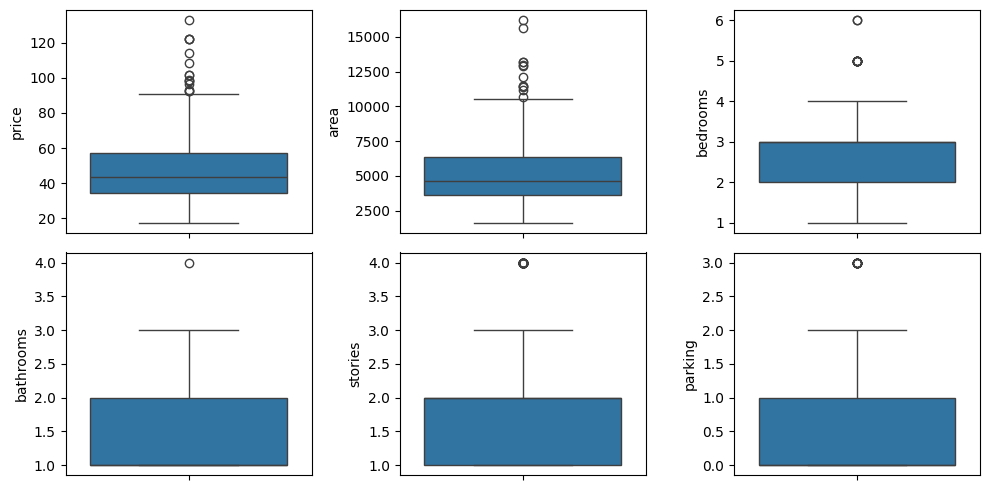

In [9]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

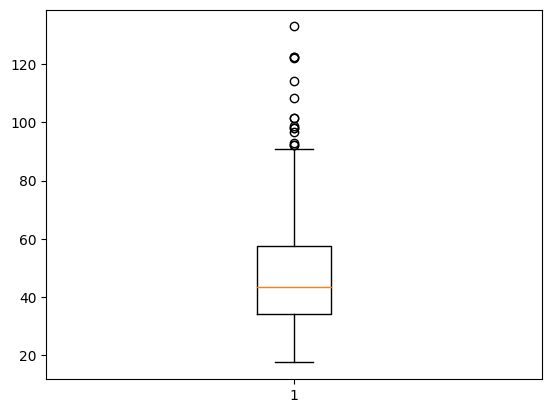

In [10]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

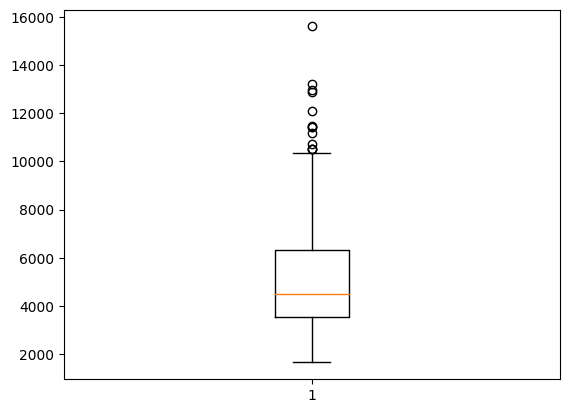

In [11]:
# outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

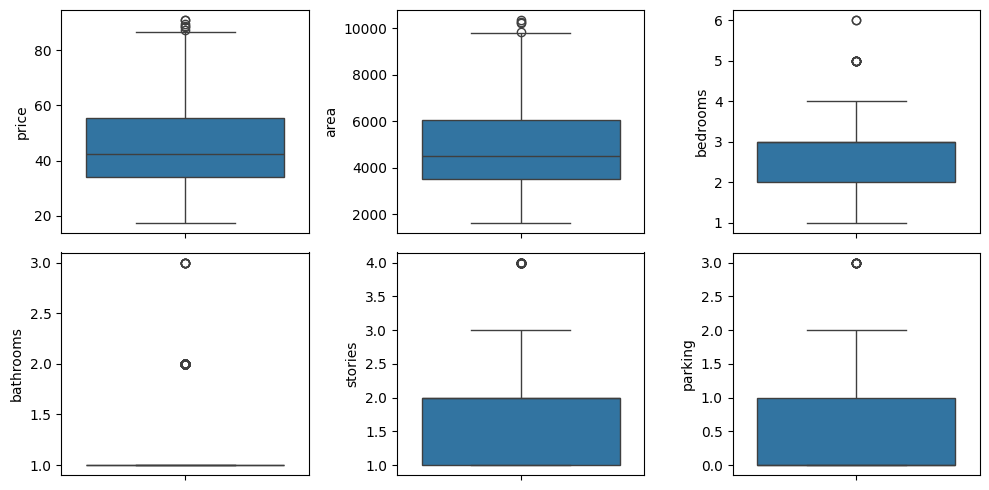

In [12]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

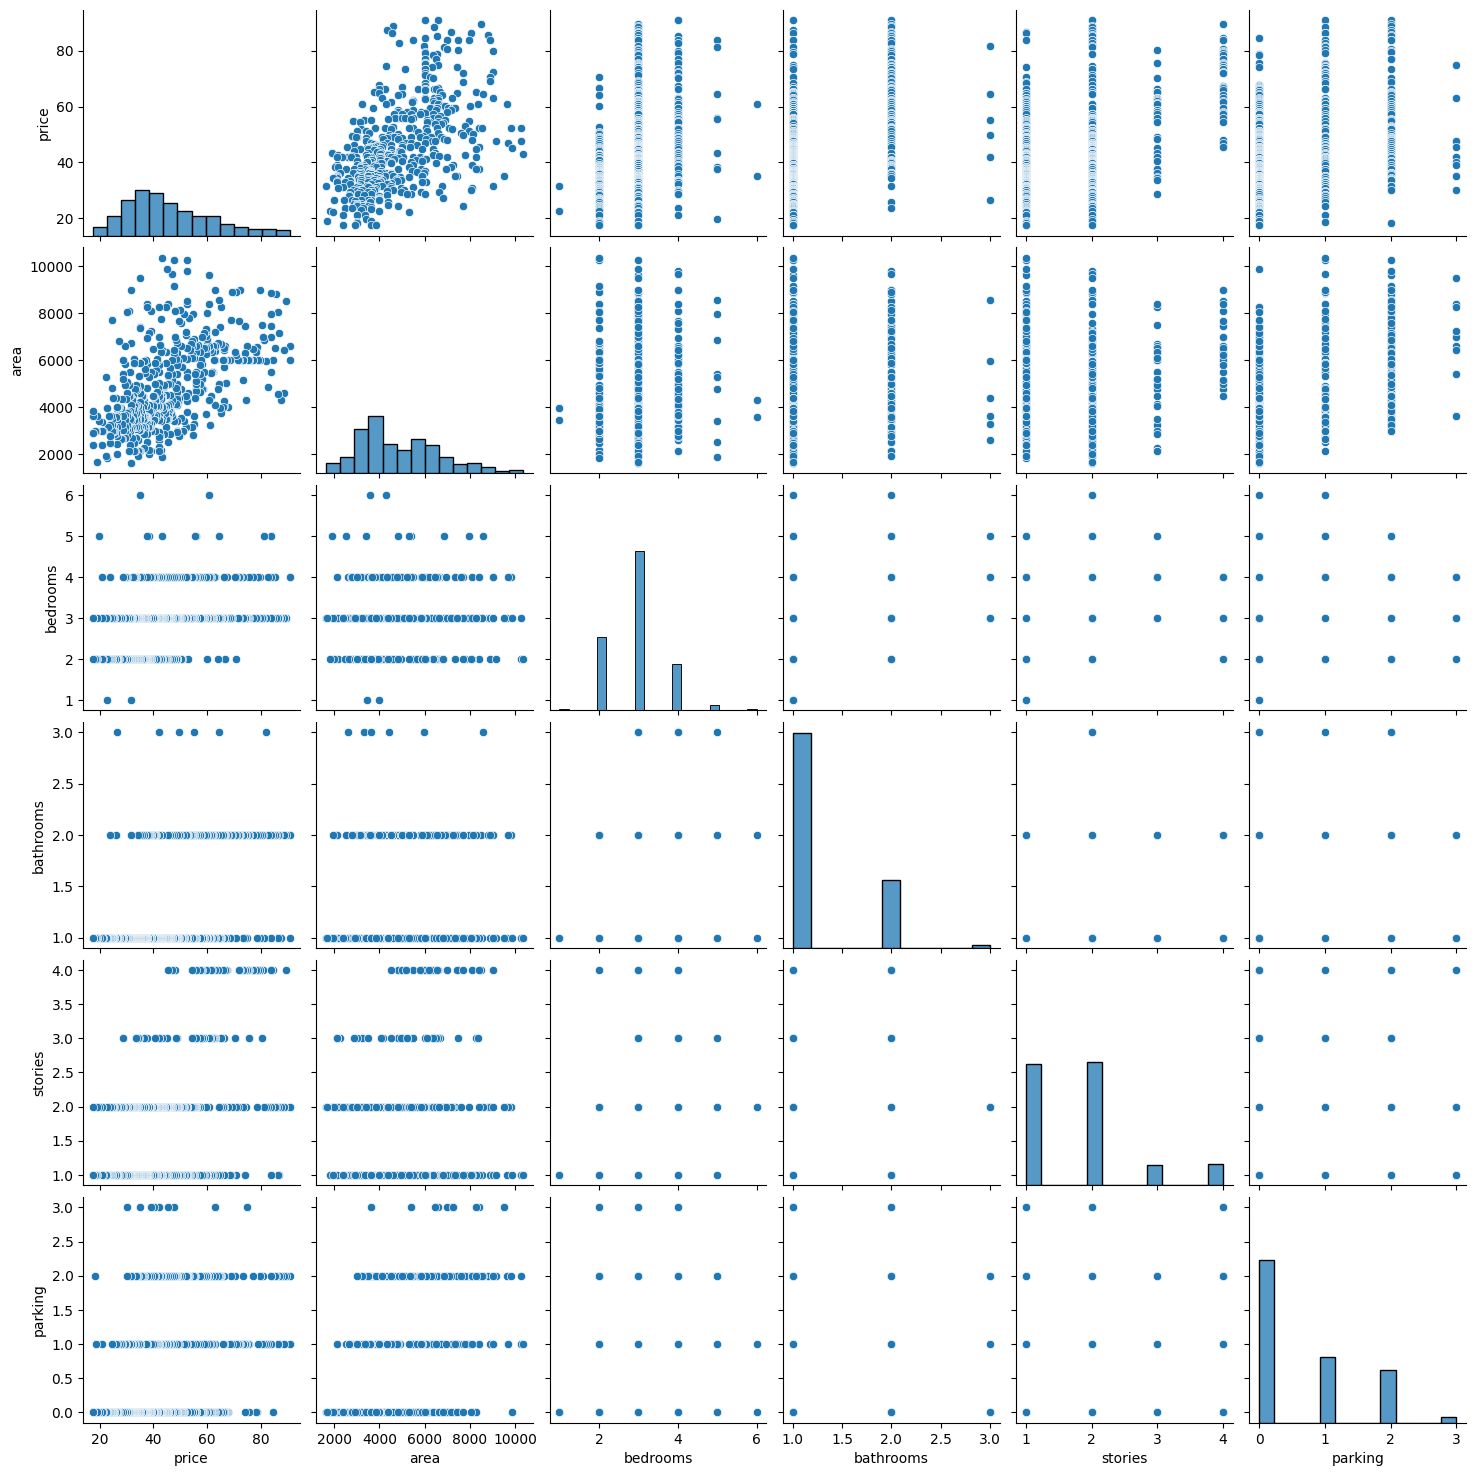

In [13]:
sns.pairplot(housing)
plt.show()

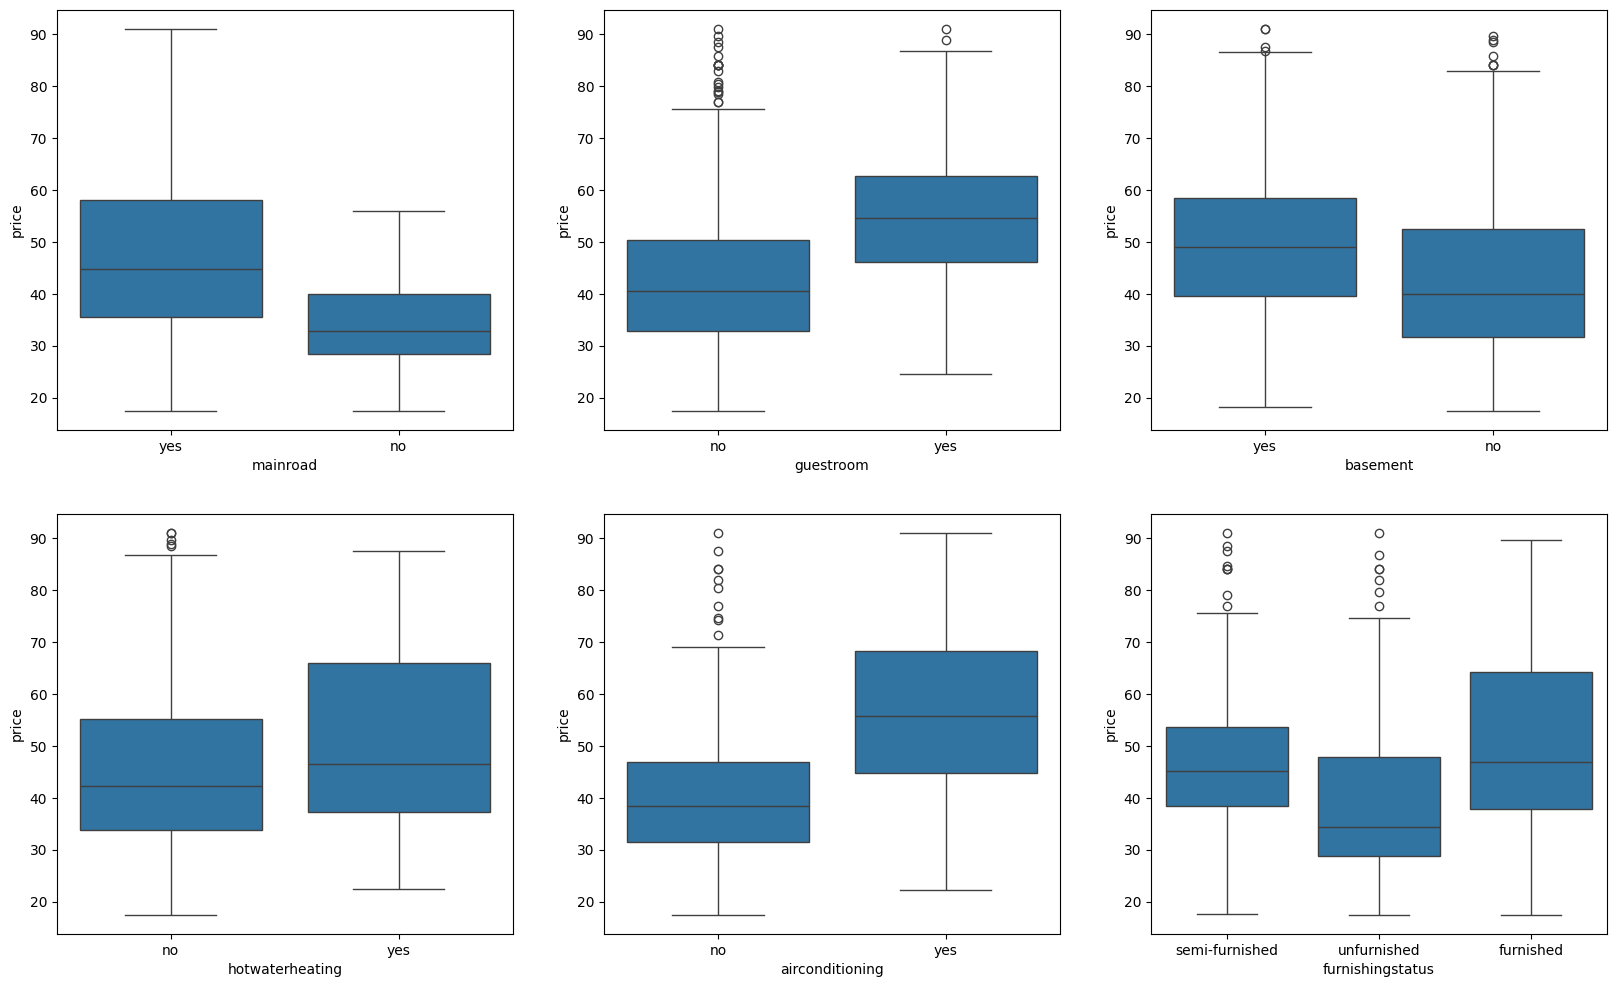

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

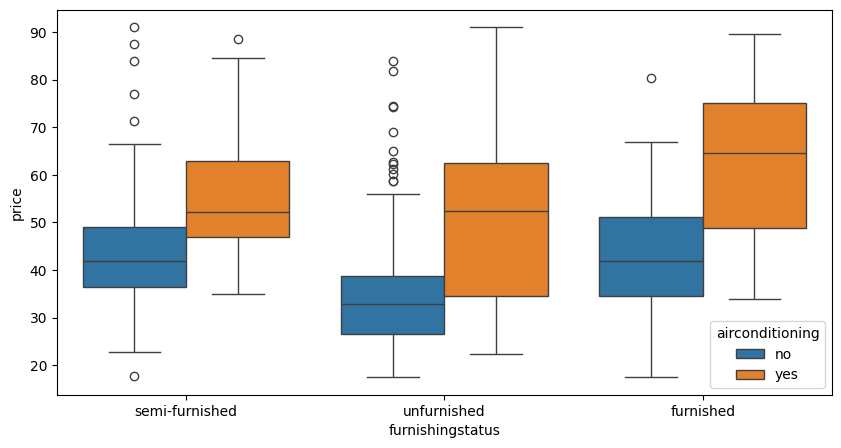

In [15]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

In [16]:
yes_no_attributes = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
mapping = {'yes': 1, 'no': 0}
for x in yes_no_attributes:
    housing[x] = housing[x].map(mapping)

In [17]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,91.00,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,91.00,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,89.60,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,88.90,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,88.55,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [18]:
# Convert categorical data to string
housing['furnishingstatus'] = housing['furnishingstatus'].astype(str)

# Perform one-hot encoding on the 'furnishingstatus' column
housing = pd.get_dummies(housing, columns=['furnishingstatus'], drop_first=True, dtype=int)

In [19]:
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,91.00,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,91.00,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,89.60,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,88.90,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,88.55,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [20]:
X = housing.drop('price', axis='columns')

In [21]:
y = housing.price

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

X[num_vars] = scaler.fit_transform(X[num_vars])

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361 entries, 338 to 122
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   area                             361 non-null    float64
 1   bedrooms                         361 non-null    float64
 2   bathrooms                        361 non-null    float64
 3   stories                          361 non-null    float64
 4   mainroad                         361 non-null    int64  
 5   guestroom                        361 non-null    int64  
 6   basement                         361 non-null    int64  
 7   hotwaterheating                  361 non-null    int64  
 8   airconditioning                  361 non-null    int64  
 9   parking                          361 non-null    float64
 10  prefarea                         361 non-null    int64  
 11  furnishingstatus_semi-furnished  361 non-null    int64  
 12  furnishingstatus_unfurnis

In [26]:
X_train.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,0.367815,0.383934,0.128809,0.258541,0.853186,0.171745,0.340720,0.052632,0.313019,0.212373,0.204986,0.398892,0.349030
std,0.201153,0.145553,0.231303,0.286973,0.354412,0.377682,0.474609,0.223607,0.464366,0.274122,0.404252,0.490350,0.477325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.220436,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.316877,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.499426,0.400000,0.000000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.989552,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


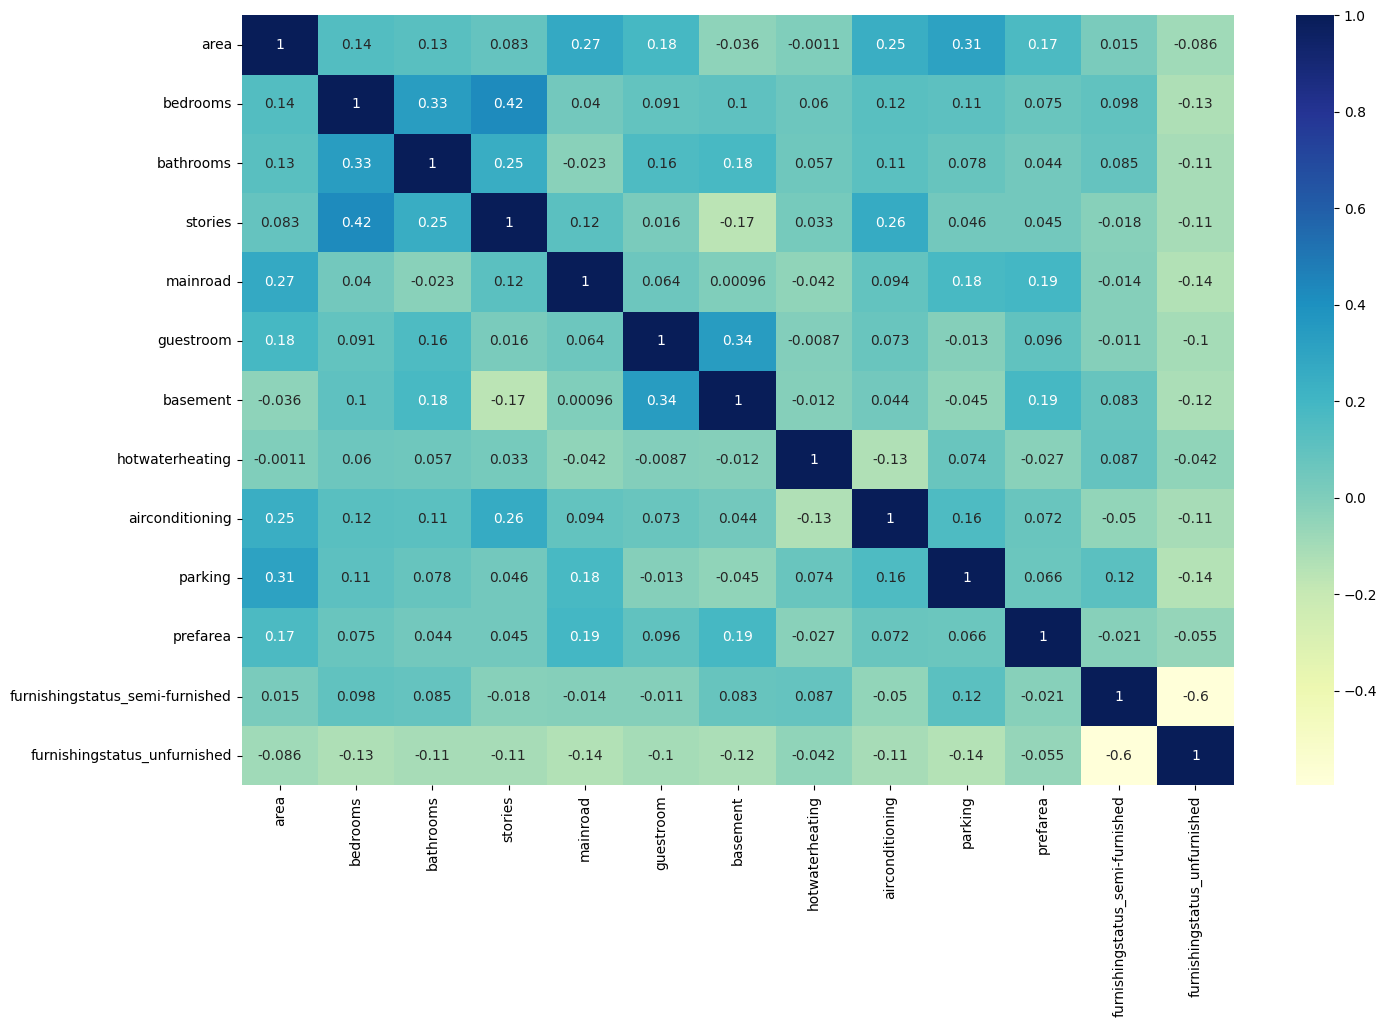

In [27]:
plt.figure(figsize = (16, 10))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = lm.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse_lr)

Linear Regression Mean Squared Error: 85.5741101679984


In [32]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7101226832065198

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Make predictions using Random Forest regression model
y_pred_rf = model_rf.predict(X_test)

# Evaluate the Random Forest regression model using Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)
r2_score(y_test, y_pred_rf)

Random Forest Mean Squared Error: 102.19578693147156


0.6538177207436324

In [35]:
import joblib
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(model_rf, 'model.joblib')

['model.joblib']